# Dimension Reduction and Clustering Analysis

In [36]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import warnings
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("wine-clustering.csv")

### Description of the dataset

#### Source

This dataset presents the outcomes of a chemical examination conducted on wines 
originating from a common Italian region, yet sourced from three distinct grape varieties. 
The analysis specifically identifies the levels of 13 different constituents present in each 
of the three wine types.


In [4]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Columns Description

| Columns | Type | Description |
|---------|------|-------------|
| Alcohol | Numeric | Influence the perception of body and sweetness in wine |
| Malic_Acid | Numeric | Kind of acid with strong acidity and apple aroma |
| Ash | Numeric | The essence of ash is an inorganic salt, which has an effect on the overall flavor of the wine and can give the wine a fresh feeling |
| Ash_Alcanity | Numeric | Measure of weak alkalinity dissolved in water |
| Magnesium | Integer | Essential element of the human body, which can promote energy metabolism |
| Total_Phenols | Numeric | Molecules containing polyphenolic substances |
| Flavanoids | Numeric | Beneficial antioxidant for the heart and anti-aging |
| Nonflavanoid_Phenols | Numeric | Special aromatic gas with oxidation resistance |
| Proanthocyanins | Numeric | Bioflavonoid compound, which is also a natural antioxidant with a slight bitter smell |
| Color_Intensity | Numeric | Degree of color shade |
| Hue | Numeric | Vividness of the color and the degree of warmth and coldness |
| OD280 | Numeric | OD280/OD315 is a ratio for determining the protein concentration, which can determine the protein content of various wines |
| Proline | Integer | Main amino acid in red wine |

In [5]:
S = df.shape
print('Number of columns:', S[1])
print('Number of rows:', S[0])
s1=df.isnull().sum();print(s1)

Number of columns: 13
Number of rows: 178
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


We have 178 samples for each of the 13 attributes, and there are no missing values.

In [6]:
df.describe(percentiles = [0.1,0.25,0.5,0.75,0.9]).T.round(2)

,count,mean,std,min,10%,25%,50%,75%,90%,max
Alcohol,178.0,13.00,0.81,11.03,11.93,12.36,13.05,13.68,14.10,14.83
Malic_Acid,178.0,2.34,1.12,0.74,1.25,1.60,1.87,3.08,3.98,5.80
Ash,178.0,2.37,0.27,1.36,2.00,2.21,2.36,2.56,2.70,3.23
Ash_Alcanity,178.0,19.49,3.34,10.60,16.00,17.20,19.50,21.50,24.00,30.00
Magnesium,178.0,99.74,14.28,70.00,85.00,88.00,98.00,107.00,118.00,162.00
Total_Phenols,178.0,2.30,0.63,0.98,1.47,1.74,2.36,2.80,3.04,3.88
Flavanoids,178.0,2.03,1.00,0.34,0.61,1.20,2.13,2.88,3.23,5.08
Nonflavanoid_Phenols,178.0,0.36,0.12,0.13,0.22,0.27,0.34,0.44,0.53,0.66
Proanthocyanins,178.0,1.59,0.57,0.41,0.85,1.25,1.56,1.95,2.31,3.58
Color_Intensity,178.0,5.06,2.32,1.28,2.55,3.22,4.69,6.20,8.53,13.00


#### Exploratory Data Analysis

The variables are all numeric and hence we plotted the following:
- Histogram to get an idea of their distribution
- Boxplot to get the distribution of the outliers present in every column

#### Histograms and Boxplots

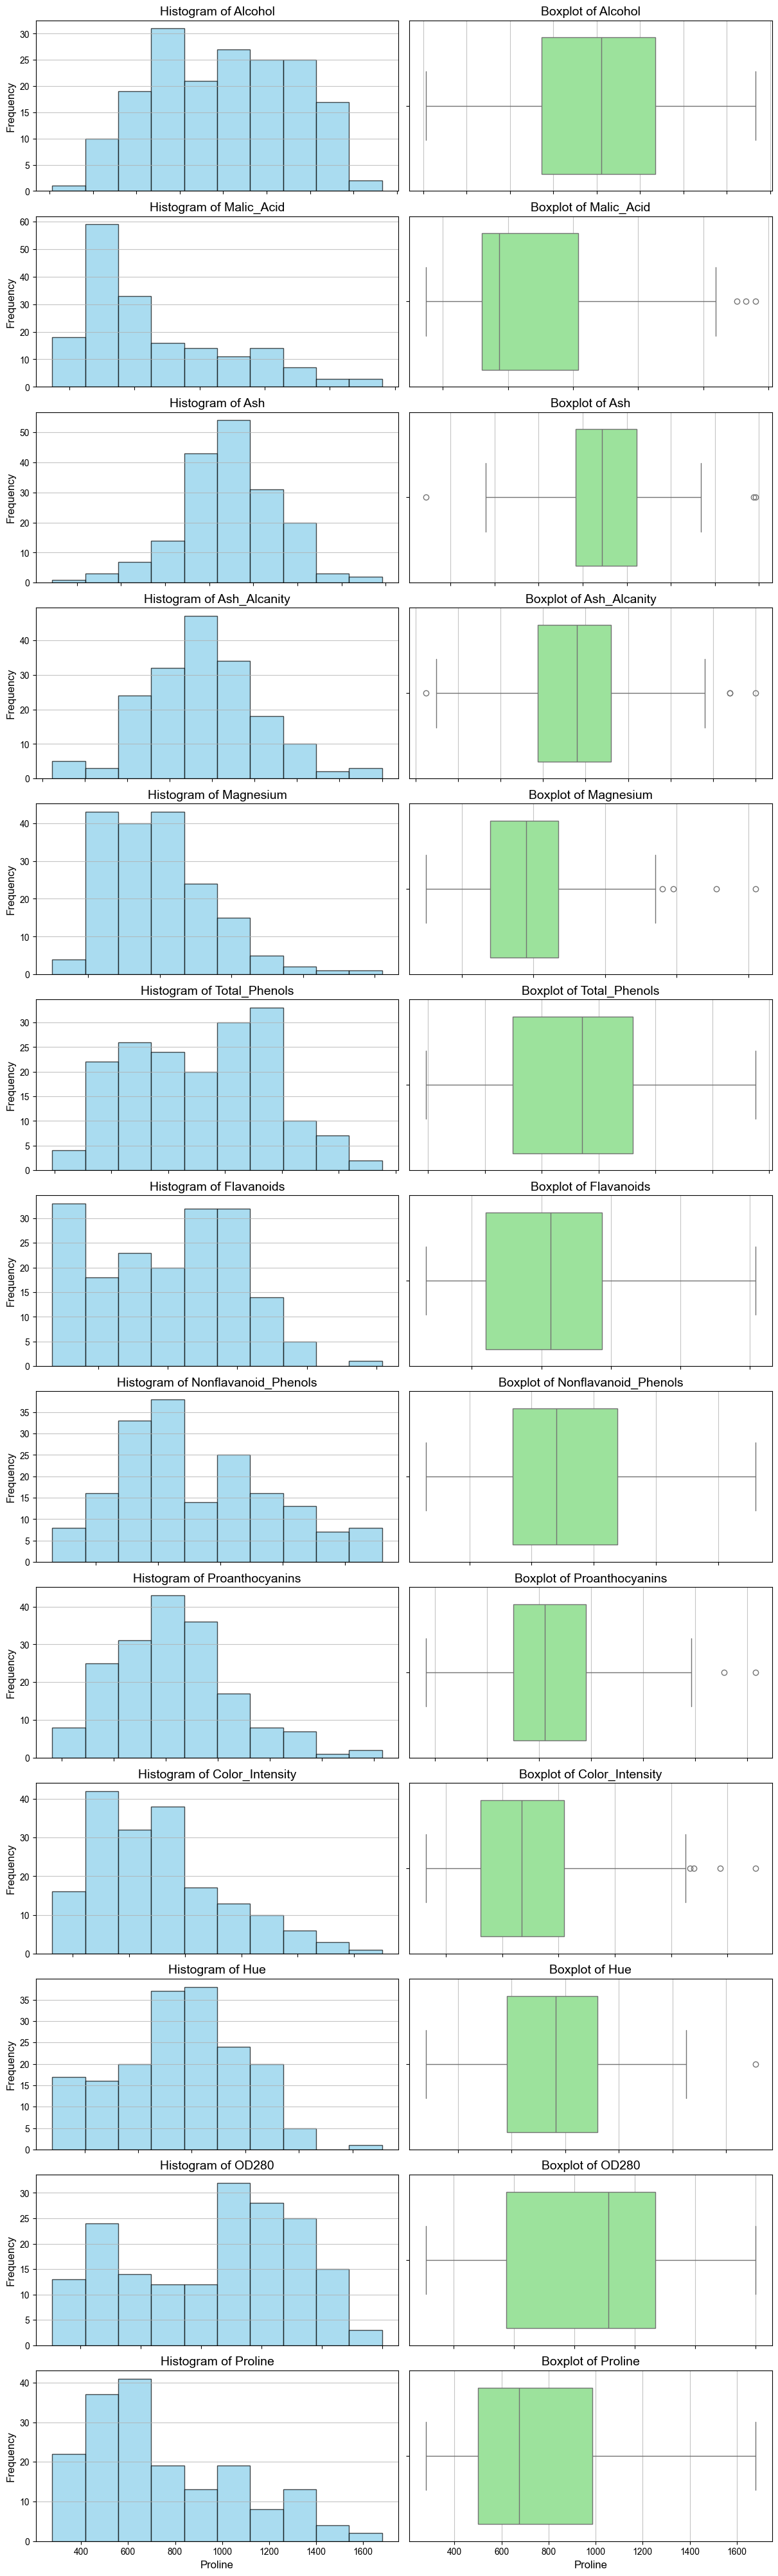

In [7]:
fig, axs = plt.subplots(13, 2, figsize=(12, 40), constrained_layout=True)

# Set Seaborn style
sns.set(style='whitegrid')

for k in range(13):
    # Histogram
    axs[k, 0].hist(df.iloc[:, k], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    axs[k, 0].set_title(f"Histogram of {df.columns[k]}", fontsize=14)
    axs[k, 0].set_xlabel(df.columns[k], fontsize=12)
    axs[k, 0].set_ylabel('Frequency', fontsize=12)
    axs[k, 0].grid(axis='y', alpha=0.75)

    # Boxplot
    sns.boxplot(data=df.iloc[:, k], ax=axs[k, 1], color='lightgreen', orient='h')
    axs[k, 1].set_title(f"Boxplot of {df.columns[k]}", fontsize=14)
    axs[k, 1].set_xlabel(df.columns[k], fontsize=12)
    axs[k, 1].grid(axis='x', alpha=0.75)

# Adjust font sizes for better readability
for ax in axs.flat:
    ax.label_outer()
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(10)

# Show the plots
plt.show()

Below  we have the correlations between the variables

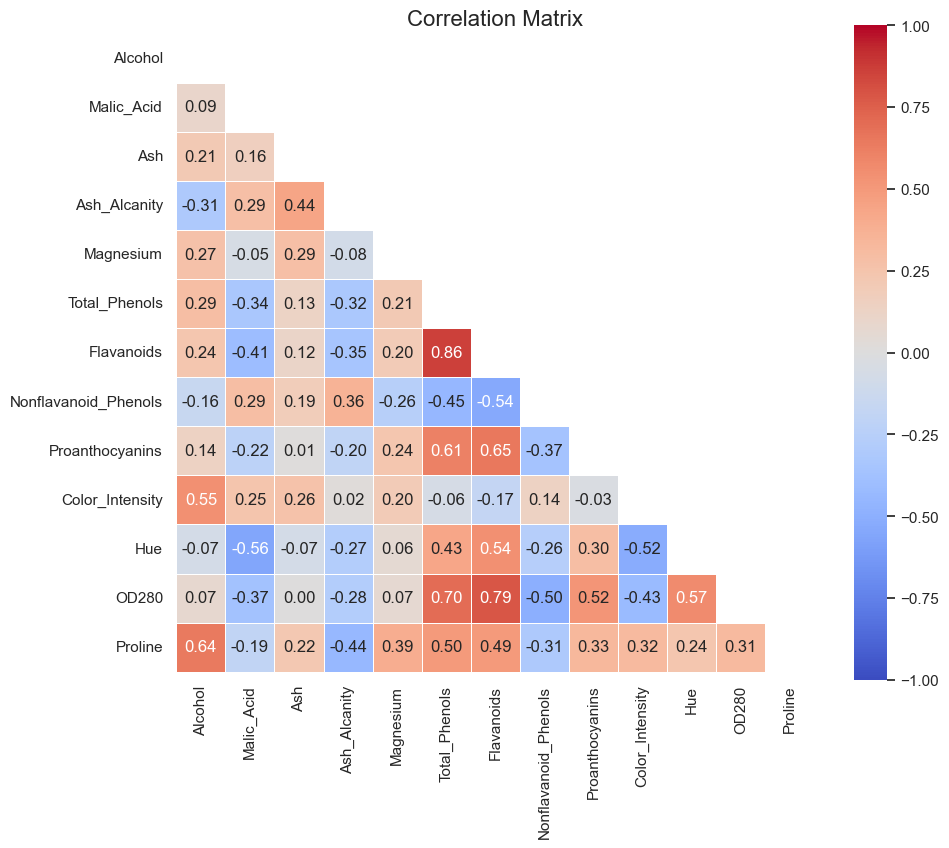

In [8]:
C = df.corr()

mask = np.triu(np.ones_like(C, dtype=bool))

sns.set_theme(style="white")
plt.figure(figsize=(10, 10))
sns.heatmap(C, mask=mask, annot=True, cmap="coolwarm", vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75}, fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

### Principal Component Analysis (PCA)

- The feature variables are given by: $\mathbf{X} = (X_1, X_2, X_3, \ldots, X_{13})$

- Let $\mathbf{\mu}^{13\times1}$ be the mean vector and $\mathbf{\Sigma}^{13\times13}$ be the variamce-covarience matrix of $\mathbf{X}$, where $\mathbf{\Sigma}$ is positive definite. 

- Let $(\lambda_1, e_1), (\lambda_2, e_2), \ldots, (\lambda_{13}, e_{13})$ be the eigen value - eigen vector pairs  of $\mathbf{\Sigma}$ matrix. Then the $i^{\text{th}}$ principal components are defined as below:

$$
\mathbf{Y_i}^{178\times1} = \begin{pmatrix} 
                Y_{1i} \\ Y_{2i} \\ \vdots\\ Y_{{\bar{178}i}} 
               \end{pmatrix} = 
               \begin{pmatrix}
               e_{i1}X_{11} + e_{i2}X_{12} + \ldots + e_{i\bar{13}}X_{1\bar{13}} \\
               e_{i1}X_{21} + e_{i2}X_{22} + \ldots + e_{i\bar{13}}X_{2\bar{13}} \\
               \vdots \\
               e_{i1}X_{\bar{178}1} + e_{i2}X_{\bar{178}2} + \ldots + e_{i\bar{13}}X_{\bar{178}\bar{13}}
               \end{pmatrix} = \mathbf{X}'e_i = 
               \begin{pmatrix}
               e_{i1} & e_{i2} & \ldots & e_{i\bar{13}}
               \end{pmatrix} \begin{pmatrix}
               X_1 \\ X_2 \\ \vdots\\ X_{13}
               \end{pmatrix}
$$

- So, the principal components in matrix form is given by: $\mathbf{Y} = X'A$

- Where $A$ is the matrix of eigen vectors (eigen vectors are along the columns of $A$)


- The proportion of variation in the data matrix $\mathbf{X}$ explained by the $i^{\text{th}}$ principal component $(Y_i)$ is: $\lambda_i\ (i = 1,2,\ldots,13)$
- $\lambda_1 \geq \lambda_2 \geq \ldots\geq\lambda_{13}$

#### Some important plots:
- **Scree plot:**
The Scree Plot is used to visualize the proportion of total variance explained by each principal component in Principal Component Analysis (PCA). It helps in determining how many principal components should be retained to capture the majority of the data's variability.

- **Cumulative Variance Plot:**
Cumulative Variance Plot is used to visualize the cumulative percentage of the total variance explained as more principal components are added. This plot helps you decide how many components are needed to explain a certain percentage of the total variance (e.g., $\small{90\%}$, $\small{95\%}$).

#### The analysis is given below:

We at first scale the entire data

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
scaled_df=pd.DataFrame(df_scaled,columns=df.columns);

We find the PCA after this

In [10]:
pca = PCA()
pca.fit(df_scaled)

print('The explained variances (eigen values) are shown below:\n')
(pca.explained_variance_).round(2).tolist()

The explained variances (eigen values) are shown below:



[4.73, 2.51, 1.45, 0.92, 0.86, 0.65, 0.55, 0.35, 0.29, 0.25, 0.23, 0.17, 0.1]

In [11]:
L = pca.explained_variance_

comp_df = pd.DataFrame({
    'Index': np.arange(1, len(L) + 1),
    'Explained Variance': L.round(2),
    'Percentage of total variance (%)': (100*L/sum(L)).round(2),
    'Percentage of Cumulative variance (%)': np.cumsum((100*L/sum(L))).round(2)
})

comp_df

,Index,Explained Variance,Percentage of total variance (%),Percentage of Cumulative variance (%)
0,1,4.73,36.20,36.20
1,2,2.51,19.21,55.41
2,3,1.45,11.12,66.53
3,4,0.92,7.07,73.60
4,5,0.86,6.56,80.16
5,6,0.65,4.94,85.10
6,7,0.55,4.24,89.34
7,8,0.35,2.68,92.02
8,9,0.29,2.22,94.24
9,10,0.25,1.93,96.17


#### Scree Plot

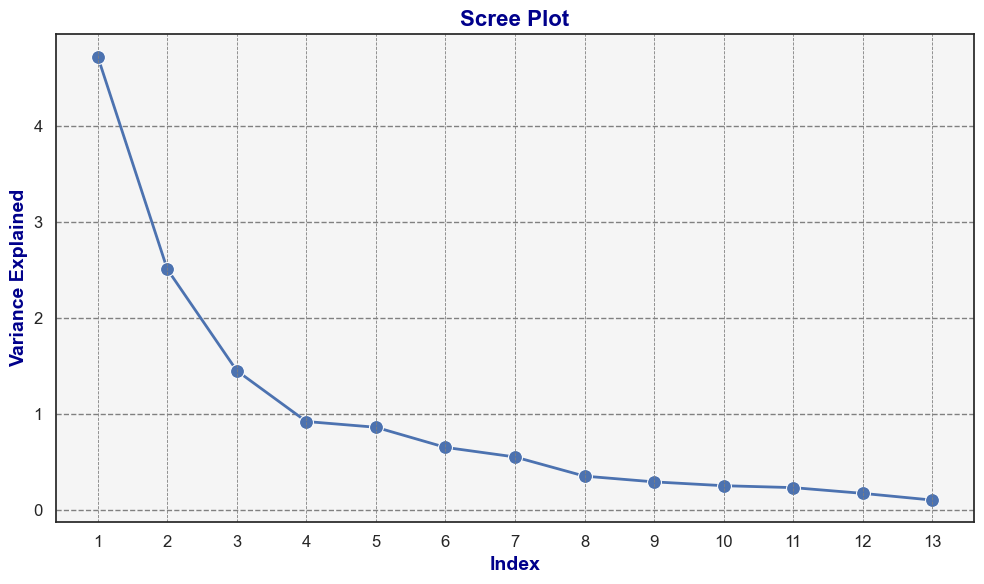

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    x = 'Index', 
    y = 'Explained Variance', 
    data = comp_df, 
    marker = 'o', 
    color = 'b', 
    markersize = 10, 
    linewidth = 2
)
ax.set_title('Scree Plot', fontsize=16, weight='bold', color='darkblue')
ax.set_xlabel('Index', fontsize=14, weight='bold', color='darkblue')
ax.set_ylabel('Variance Explained', fontsize=14, weight='bold', color='darkblue')
ax.set_xticks(np.arange(1, len(L) + 1))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', color='gray')

for i in range(len(L)):
    plt.axvline(x=i+1, color='gray', linestyle='--', linewidth=0.6)

ax.set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

From the scree plot, we see that the elbow of the graph occurs at k=5, so we take k as the required number of principal components

#### Deciding the number of PCs required to explain a certain amount of variance in the data:

In [13]:
def comp_needed(target_variance):
    components = comp_df[comp_df['Percentage of Cumulative variance (%)'] >= target_variance]['Index']
    return f"{components.iloc[0]} components are needed to explain {target_variance}% variance"

comp_needed(80)

'5 components are needed to explain 80% variance'

#### Cumulative Variance Plot (%)

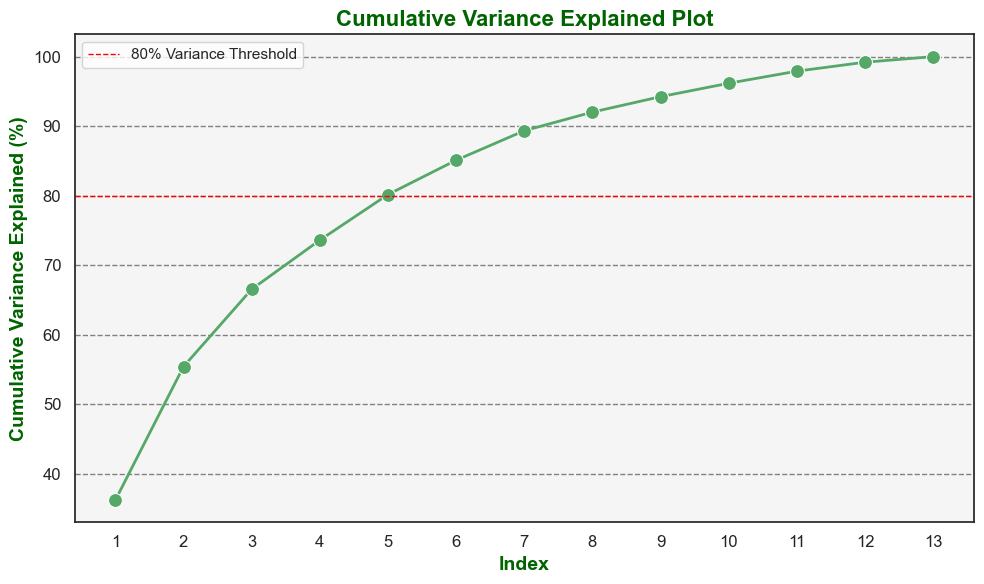

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    x='Index', 
    y='Percentage of Cumulative variance (%)', 
    data=comp_df, 
    marker='o', 
    color='g', 
    markersize=10, 
    linewidth=2
)

ax.set_title('Cumulative Variance Explained Plot', fontsize=16, weight='bold', color='darkgreen')
ax.set_xlabel('Index', fontsize=14, weight='bold', color='darkgreen')
ax.set_ylabel('Cumulative Variance Explained (%)', fontsize=14, weight='bold', color='darkgreen')
ax.set_xticks(np.arange(1, len(L) + 1))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', color='gray')

ax.set_facecolor('whitesmoke')

plt.axhline(y=80, color='red', linestyle='--', linewidth=1, label='80% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()

We now find the first 5 principal components

In [15]:
pca_5=PCA(n_components=5)
PC=pd.DataFrame(pca_5.fit_transform(df_scaled),columns=["pc1","pc2","pc3","pc4","pc5"])
PC

,pc1,pc2,pc3,pc4,pc5
0,3.316751,1.443463,-0.165739,-0.215631,0.693043
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,1.031151,0.982819,0.724902,-0.251033
3,3.757066,2.756372,-0.176192,0.567983,-0.311842
4,1.008908,0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,1.757229,0.207581,0.349496,0.255063
175,-2.677839,2.760899,-0.940942,0.312035,1.271355
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955


Below are the correlations of the variables with the obtained principal components

In [28]:

def highlight_extreme_values(val):
    if abs(val) > 0.5:  # Adjust this threshold as needed
        color = 'red'
        return f'background-color: {color}; color: white'
    return ''

# Apply the styling
styled_df = pd.concat([scaled_df,PC],axis=1).corr().iloc[:13,13:].style.applymap(highlight_extreme_values)

# Display the styled DataFrame
styled_df

,pc1,pc2,pc3,pc4,pc5
Alcohol,0.313093,0.764257,-0.249383,-0.017118,-0.245394
Malic_Acid,-0.531885,0.355432,0.107040,0.514680,0.032527
Ash,-0.004449,0.499446,0.753051,-0.205315,-0.132113
Ash_Alcanity,-0.519157,-0.016735,0.736043,0.058342,0.061060
Magnesium,0.308023,0.473476,0.157239,-0.337243,0.671577
Total_Phenols,0.856137,0.102774,0.175784,0.189875,-0.137926
Flavanoids,0.917470,-0.005309,0.181199,0.145995,-0.100708
Nonflavanoid_Phenols,-0.647607,0.045477,0.204872,-0.194891,-0.462501
Proanthocyanins,0.679922,0.062104,0.179723,0.382548,0.126418
Color_Intensity,-0.192236,0.837489,-0.165114,0.063198,-0.070605


**Performing Bi-Plot**

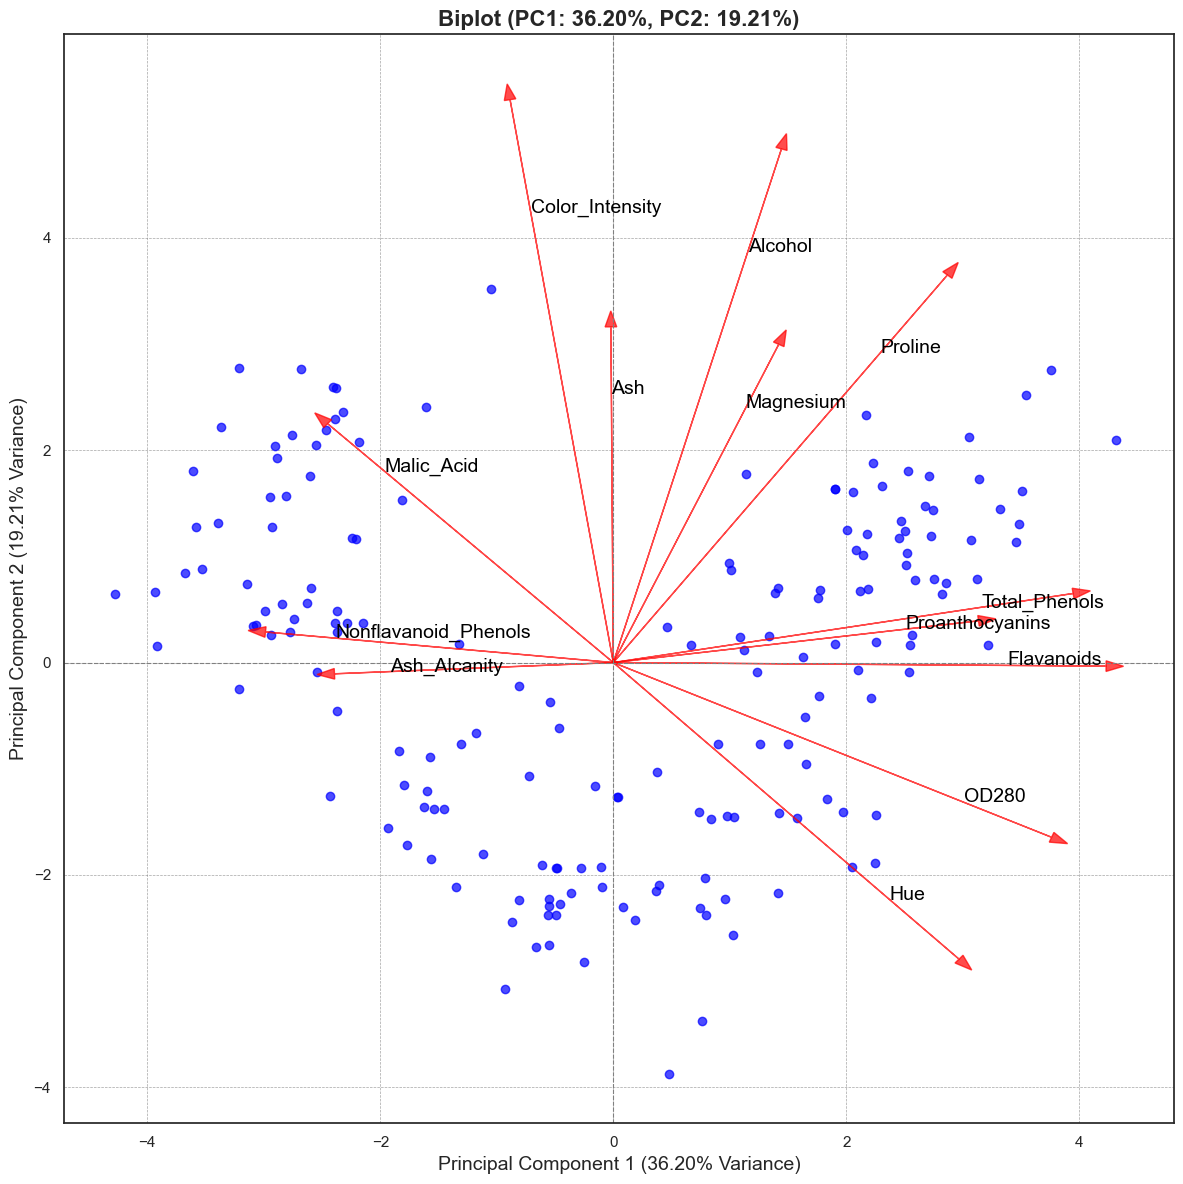

In [35]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for biplot
principal_components = pca.fit_transform(df_scaled)
pc1_var = pca.explained_variance_ratio_[0]*100
pc2_var = pca.explained_variance_ratio_[1]*100

# reate a biplot
plt.figure(figsize=(12, 12))
plt.scatter(
    principal_components[:, 0], 
    principal_components[:, 1], 
    alpha=0.7, 
    color="blue", 
    label="Samples"
)

loadings = pca.components_.T  # Transpose to align with original features
arrow_scaling = 10  # Scale arrows for better visibility
text_offset = 8  # Increase offset for variable names
for i, feature in enumerate(df.columns):  # Iterate through features
    plt.arrow(0, 0, loadings[i, 0] * arrow_scaling, loadings[i, 1] * arrow_scaling, 
              color="red", alpha=0.7, head_width=0.1, head_length=0.15)
    plt.text(loadings[i, 0] * text_offset, loadings[i, 1] * text_offset, feature, 
             color="black", fontsize=14)

# Customize the plot
plt.axhline(0, color="gray", linewidth=0.8, linestyle="--")
plt.axvline(0, color="gray", linewidth=0.8, linestyle="--")
plt.title(f"Biplot (PC1: {pc1_var:.2f}%, PC2: {pc2_var:.2f}%)", fontsize=16, fontweight="bold")
plt.xlabel(f"Principal Component 1 ({pc1_var:.2f}% Variance)", fontsize=14)
plt.ylabel(f"Principal Component 2 ({pc2_var:.2f}% Variance)", fontsize=14)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

## **Factor Analysis**

Let $\small{X}$ be the data matrix having $\small{p}$ components. The mean of $\small{X}$ is $\small{\mu}$ and the variance-covariance matrix is $\small{\Sigma}$. According to the factor model, $\small{X}$ is  linearly dependent upon a few unobservable random variables $\small{F_1, F_2,\ldots, F_m}$. The model is given below:

$$
X_1 - \mu_1 = l_{11}F_1 + l_{12}F_2 + \ldots + l_{1m}F_m + \epsilon_1 \\
X_2 - \mu_2 = l_{21}F_1 + l_{22}F_2 + \ldots + l_{2m}F_m + \epsilon_2 \\
\vdots \\
X_p - \mu_p = l_{p1}F_1 + l_{p2}F_2 + \ldots + l_{pm}F_m + \epsilon_p
$$

So, in matrix notation, we have the following:
$$
(\mathbf{X} - \mathbf{\mu})^{p\times1} = \mathbf{L}^{p\times m}\mathbf{F}^{m\times1} + \mathbf{\epsilon}^{p\times 1}
$$

Where,
- $F = \begin{pmatrix} F_1 \\ F_2 \\ \vdots \\ F_m \end{pmatrix}$ is the vector of factors.
- $L = \begin{pmatrix} l_{11} & l_{12} & \cdots & l_{1m} \\
                        l_{21} & l_{22} & \cdots & l_{2m}\\
                        \vdots & \vdots & \cdots & \vdots \\
                        l_{p1} & l_{p2} & \cdots & l_{pm} \end{pmatrix}$ is the matrix of factor loadings.
- $\epsilon = \begin{pmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_p \end{pmatrix}$ is the error vector.


The assumptions of the factor model are the following:
- $\mathbb{E}(F) = \mathbf{0}$
- $\text{Cov}(F) = I_{m\times m}\longleftarrow\text{Variance - Covariance matrix of}\ F$
- $\small{\mathbb{E}(\epsilon)} = \mathbf{0}$
- $\text{Cov}(\mathbf{\epsilon}) = \Psi^{p\times p} = \text{diag}\{\psi_1, \psi_2, \ldots, \psi_p\}\longleftarrow\text{Variance - Covariance matrix of}\ \epsilon$
- $\text{Cov}(\epsilon,F) = \mathbf{0}$

We have the following relation:
- $\Sigma = LL' + \Psi$

In [ ]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Store eigenpairs as a list of tuples
eigen_pairs = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]

In [18]:
eigen_pairs = [(pca.explained_variance_[i], pca.components_[i]) for i in range(len(pca.explained_variance_))]

# Create the loading matrix L
L = pd.DataFrame(index=df.columns)
for j in range(13):
    L[f"{j+1}_load"] = math.sqrt(eigen_pairs[j][0]) * eigen_pairs[j][1]

# Display the loading matrix
print("Loading Matrix L:")
L

Loading Matrix L:


,1_load,2_load,3_load,4_load,5_load,6_load,7_load,8_load,9_load,10_load,11_load,12_load,13_load
Alcohol,0.313977,0.766413,-0.250087,-0.017166,-0.246087,0.171534,-0.041982,0.234515,-0.274141,0.106292,-0.107652,-0.109703,0.004827
Malic_Acid,-0.533385,0.356434,0.107342,0.516132,0.032619,0.431220,0.313041,0.038970,0.040577,-0.155255,0.036446,0.050136,0.008372
Ash,-0.004462,0.500855,0.755176,-0.205895,-0.132486,0.124089,-0.111044,-0.100794,0.165845,-0.013625,-0.237633,-0.020443,-0.045533
Ash_Alcanity,-0.520622,-0.016782,0.738120,0.058506,0.061232,-0.080992,-0.213622,0.253359,-0.108041,0.026522,0.228399,-0.022965,0.029561
Magnesium,0.308892,0.474812,0.157682,-0.338195,0.673472,0.030641,0.240357,-0.092566,-0.146284,0.034092,0.033970,0.025633,0.018306
Total_Phenols,0.858552,0.103064,0.176280,0.190410,-0.138315,-0.067575,-0.020788,-0.240314,-0.154170,-0.160807,0.145022,-0.125192,-0.149578
Flavanoids,0.920058,-0.005324,0.181710,0.146406,-0.100992,-0.015198,-0.045174,-0.110850,-0.026722,-0.081953,-0.012244,-0.017673,0.268346
Nonflavanoid_Phenols,-0.649434,0.045605,0.205450,-0.195440,-0.463806,-0.207727,0.443255,-0.138105,-0.105374,0.108266,0.055702,0.017448,0.036770
Proanthocyanins,0.681840,0.062279,0.180230,0.383627,0.126775,-0.428795,0.277023,0.217991,0.112727,0.067403,-0.113106,-0.039365,-0.037698
Color_Intensity,-0.192778,0.839852,-0.165580,0.063377,-0.070804,-0.336295,-0.169510,-0.020008,-0.030301,-0.146061,0.015172,0.248924,-0.003867


Here, we have taken the number of factors = $\small{13}$.

For our analysis, we have considered those eigen values $>0.8$.

This gives us $5$ factors for our analysis

In [19]:
fa_pc = FactorAnalyzer(method='principal', n_factors=5)
fa_pc.fit(df_scaled)

# Get the rotated loadings (This is the correct attribute)
pc_loadings = fa_pc.loadings_

# Create the rotated loading matrix L_rotated
L_pc = pd.DataFrame(pc_loadings, index=df.columns, columns=[f"Factor {i+1}" for i in range(pc_loadings.shape[1])])
L_pc

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Alcohol,0.086698,0.894302,-0.030082,0.124832,-0.061502
Malic_Acid,0.162336,0.021825,0.087217,0.864872,-0.136192
Ash,0.136204,0.199597,0.934024,-0.068190,0.174602
Ash_Alcanity,0.024439,-0.449197,0.723833,0.222956,0.084828
Magnesium,-0.126364,0.052354,0.224584,-0.137231,0.970335
Total_Phenols,0.867707,0.214349,0.105382,-0.050083,-0.100554
Flavanoids,0.870085,0.126804,0.084861,-0.149797,-0.064493
Nonflavanoid_Phenols,-0.498903,0.124359,0.389147,-0.097551,-0.390385
Proanthocyanins,0.908030,-0.034640,0.015453,0.255686,0.054510
Color_Intensity,-0.168181,0.710186,0.056063,0.432939,0.063622


In [20]:
(((L_pc**2).sum()).sum())/13

np.float64(0.8019513867917196)

In [29]:
fa_pc_rot = FactorAnalyzer(method='principal',rotation="varimax", n_factors=5)
fa_pc_rot.fit(df_scaled)

# Get the rotated loadings (This is the correct attribute)
pc_loadings_rot = fa_pc_rot.loadings_

# Create the rotated loading matrix L_rotated
L_pc_rot = pd.DataFrame(pc_loadings_rot, index=df.columns, columns=[f"Factor {i+1}" for i in range(pc_loadings.shape[1])])
L_pc_rot.style.applymap(highlight_extreme_values)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Alcohol,0.148048,0.876131,-0.010717,-0.108763,0.057892
Malic_Acid,-0.145566,0.006456,0.172792,-0.789327,-0.111885
Ash,0.083963,0.243116,0.885892,-0.032295,0.155428
Ash_Alcanity,-0.182331,-0.424206,0.720545,-0.293698,-0.007622
Magnesium,0.097505,0.228829,0.147883,0.053006,0.906632
Total_Phenols,0.835858,0.267710,0.031185,0.239896,0.025656
Flavanoids,0.867810,0.188985,-0.003133,0.338577,0.051141
Nonflavanoid_Phenols,-0.565508,0.003998,0.443995,-0.074755,-0.439079
Proanthocyanins,0.794571,0.054870,-0.041642,-0.025989,0.154956
Color_Intensity,-0.198213,0.695727,0.117964,-0.471743,0.121671


**Factor 1**: The $1^{st}$ factor puts heavy loadings on the variables **Total Phenols**, **Flavanoids**, **Nonflavanoid phenols**, **Proanthocyanins** and **OD280** .Phenolic compounds, Flavanoids, Proanthocyanins and OD280 reflect the phenolic content, wine color, flavor, all playing a key role in the color intensity and mouthfeel of the wine. So the $1^{st}$ factor may be called as **Mouthfeel and Color Factor**.

**Factor 2**: The $2^{nd}$ factor puts heavy loadings on the variables of **Alcohol**, **Color Intensity** and **Proline**.  Proline is known to be an amino acid that regulates the  flavor of the wine. The color intensity refers to the degree of lightness of the color, and the greater the intensity, the darker the color. It reflects the nature of the 
grapes that make the wine. Therefore the second common factor can be named as the **Visual Evaluation Factor** of wine. 

**Factor 3**: The $3^{rd}$ factor puts heavy load on the variables of **Ash** and **Alkalinity of ash**. It is known that ash in wine is an effective substance for neutralizing acidity, and is essentially an inorganic salt. So the $3^{rd}$ common factor 
can be named the **pH Factor** of wine. 

**Factor 4**: The $4^{th}$ factor puts heavy loadings on the variables **Malic Acid** and **Hue**. Malic acid influences wine freshness and acidity which softens with aging and Hue changes over time indicating wine maturation. So both represent the ageof the wine. So the $4^{th}$ factor may be called as **Age Factor**.

**Factor 5**: The $5^{th}$ factor puts heavy loading on the variable **Magnesium**. The presence of Magnesium supports yeast health and fermentation efficiency. So the $5^{th}$ factor may be called as **Fermentation Factor** .

In [22]:
fa_ml = FactorAnalyzer(method='ml', n_factors=5)
fa_ml.fit(df_scaled)

# Get the rotated loadings (This is the correct attribute)
ml_loadings = fa_ml.loadings_

# Create the rotated loading matrix L_rotated
L_ml = pd.DataFrame(ml_loadings, index=df.columns, columns=[f"Factor {i+1}" for i in range(pc_loadings.shape[1])])
L_ml

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Alcohol,0.006846,0.763545,0.238224,-0.085151,0.159259
Malic_Acid,0.013994,0.103862,-0.141533,0.046840,1.041638
Ash,0.046457,0.391395,-0.051240,0.969668,0.026694
Ash_Alcanity,0.011797,-0.392995,0.072398,0.600363,0.029464
Magnesium,-0.015662,0.442406,0.011367,0.169687,-0.030359
Total_Phenols,0.903090,0.065545,0.079017,0.088708,-0.013760
Flavanoids,0.944411,0.034285,-0.022922,0.104914,-0.037487
Nonflavanoid_Phenols,-0.455123,-0.059436,0.045716,0.223781,0.007746
Proanthocyanins,0.830282,-0.110748,0.178451,-0.004011,0.012942
Color_Intensity,0.071113,0.289848,1.043967,0.011158,-0.176922


In [30]:
fa_ml_rot = FactorAnalyzer(method='ml',rotation="varimax", n_factors=5)
fa_ml_rot.fit(df_scaled)

# Get the rotated loadings (This is the correct attribute)
ml_loadings_rot = fa_ml_rot.loadings_

# Create the rotated loading matrix L_rotated
L_ml_rot = pd.DataFrame(ml_loadings_rot, index=df.columns, columns=[f"Factor {i+1}" for i in range(pc_loadings.shape[1])])
L_ml_rot.style.applymap(highlight_extreme_values)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Alcohol,0.138065,0.736866,-0.071364,0.263946,0.125189
Malic_Acid,-0.247266,-0.012598,0.130560,0.132360,0.893067
Ash,0.035251,0.351922,0.930521,0.024078,0.058824
Ash_Alcanity,-0.246224,-0.367296,0.613015,0.091710,0.146431
Magnesium,0.112086,0.412410,0.149774,0.028062,-0.050102
Total_Phenols,0.842364,0.270214,0.014152,-0.045887,-0.132639
Flavanoids,0.912210,0.237625,0.014664,-0.146047,-0.185544
Nonflavanoid_Phenols,-0.504657,-0.153241,0.266289,0.112815,0.122090
Proanthocyanins,0.685247,0.102154,-0.051099,0.046136,-0.059044
Color_Intensity,-0.147068,0.448228,0.085268,0.868643,0.103224


**Factor 1**: The $1^{st}$ factor puts heavy loadings on the variables **Total Phenols**, **Flavanoids**, **Nonflavanoid phenols**, **Proanthocyanins** and **OD280** .Phenolic compounds, Flavanoids, Proanthocyanins and OD280 reflect the phenolic content, wine color, flavor, all playing a key role in the color intensity and mouthfeel of the wine. So the $1^{st}$ factor may be called as **Mouthfeel and Color Factor**.

**Factor 2**: The $2^{nd}$ factor puts heavy loadings on the variables **Alcohol** and **Proline**. Alcohol contributes the wines body, affecting its texture and Proline(an amino acid) contributes to its acid profile reflecting the grapes quality. So they together contribute to overall contribution of the wine. So the $2^{nd}$ factor may be called as **Composition Factor**.

**Factor 3**: The $3^{rd}$ factor puts heavy load on the variables of **Ash** and **Alkalinity of ash**. It is known that ash in wine is an effective substance for neutralizing acidity, and is essentially an inorganic salt. So the $3^{rd}$ common factor 
can be named the **pH Factor** of wine. 

**Factor 4**: The $4^{th}$ factor puts heavy loadings on the variables **Color intensity** and **Hue**. Color intensity and Hue both reflect the overall grape variety used and its ripeness, thus contributuing to the color of the wine. So the $4^{th}$ factor may be called as **Color Factor**

**Factor 5**: The $5^{th}$ factor puts heavy loading on the variable **Malic Acid**. Malic acid influences the acidity and freshness of the wine. It is essential for balancing sweetness, softenning tannins and flavor complexity. So the $5^{th}$ factor may be called as **Balacing  Factor**.

K Means Clustering

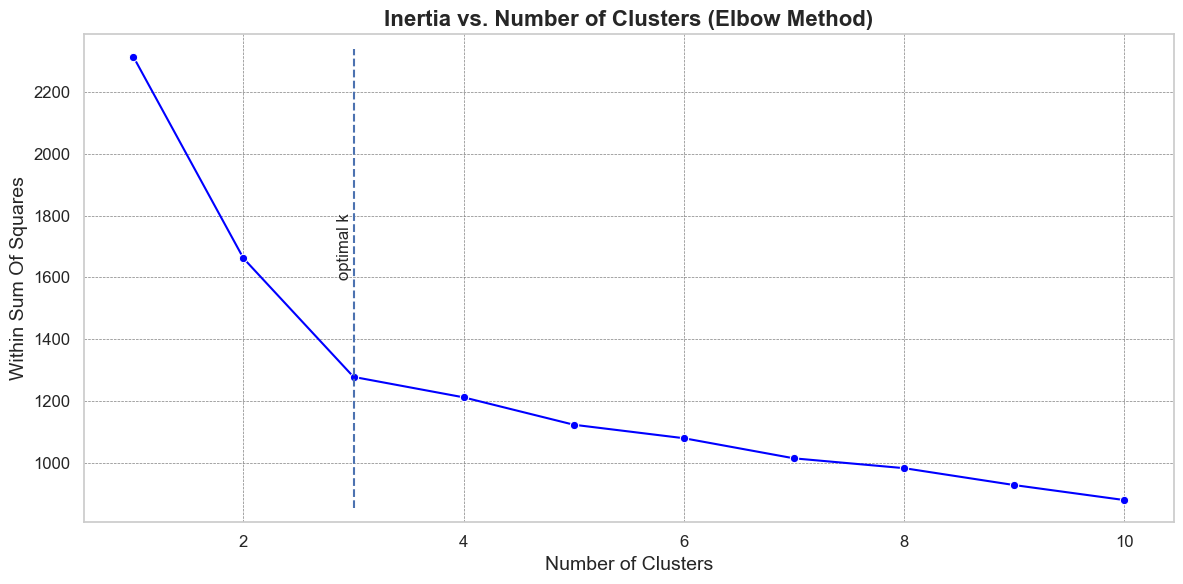

In [36]:
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)


sns.set(style="whitegrid")  
plt.figure(figsize=(12, 6)) 

sns.lineplot(x=list(cluster_range), y=inertia_values, marker="o", color="blue")
plt.title("Inertia vs. Number of Clusters (Elbow Method)", fontsize=16, fontweight="bold") 
plt.xlabel("Number of Clusters", fontsize=14)  
plt.ylabel("Within Sum Of Squares", fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.axvline(3,ymin=0.03,ymax=0.97,linestyle="--")
plt.text(x=2.85,y=1600,s="optimal k",fontsize=12,rotation="vertical")  
plt.grid(color="gray", linestyle="--", linewidth=0.5) 
plt.tight_layout() 

plt.show()

So from the elbow chart we proceed with **3** clusters

In [76]:
km=KMeans(n_clusters=3)
km.fit(df_scaled)
cluster_labels=km.predict(df_scaled)

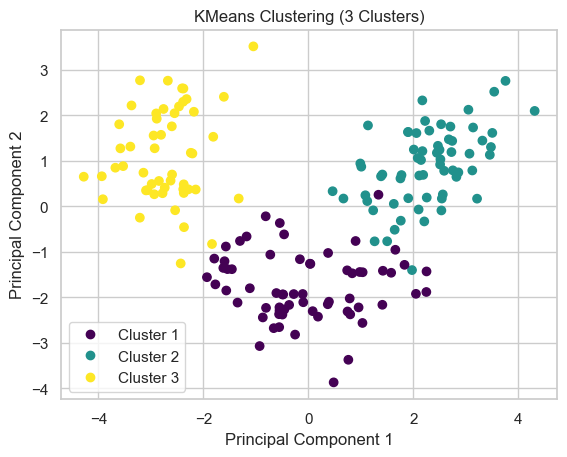

In [81]:
cmap = plt.cm.get_cmap('viridis', 3)
scatter = plt.scatter(PC.iloc[:, 0], PC.iloc[:, 1], c=cluster_labels, cmap=cmap)
handles, labels = scatter.legend_elements()
plt.legend(handles,['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (3 Clusters)')
plt.show()

**Hierarchial Clustering**

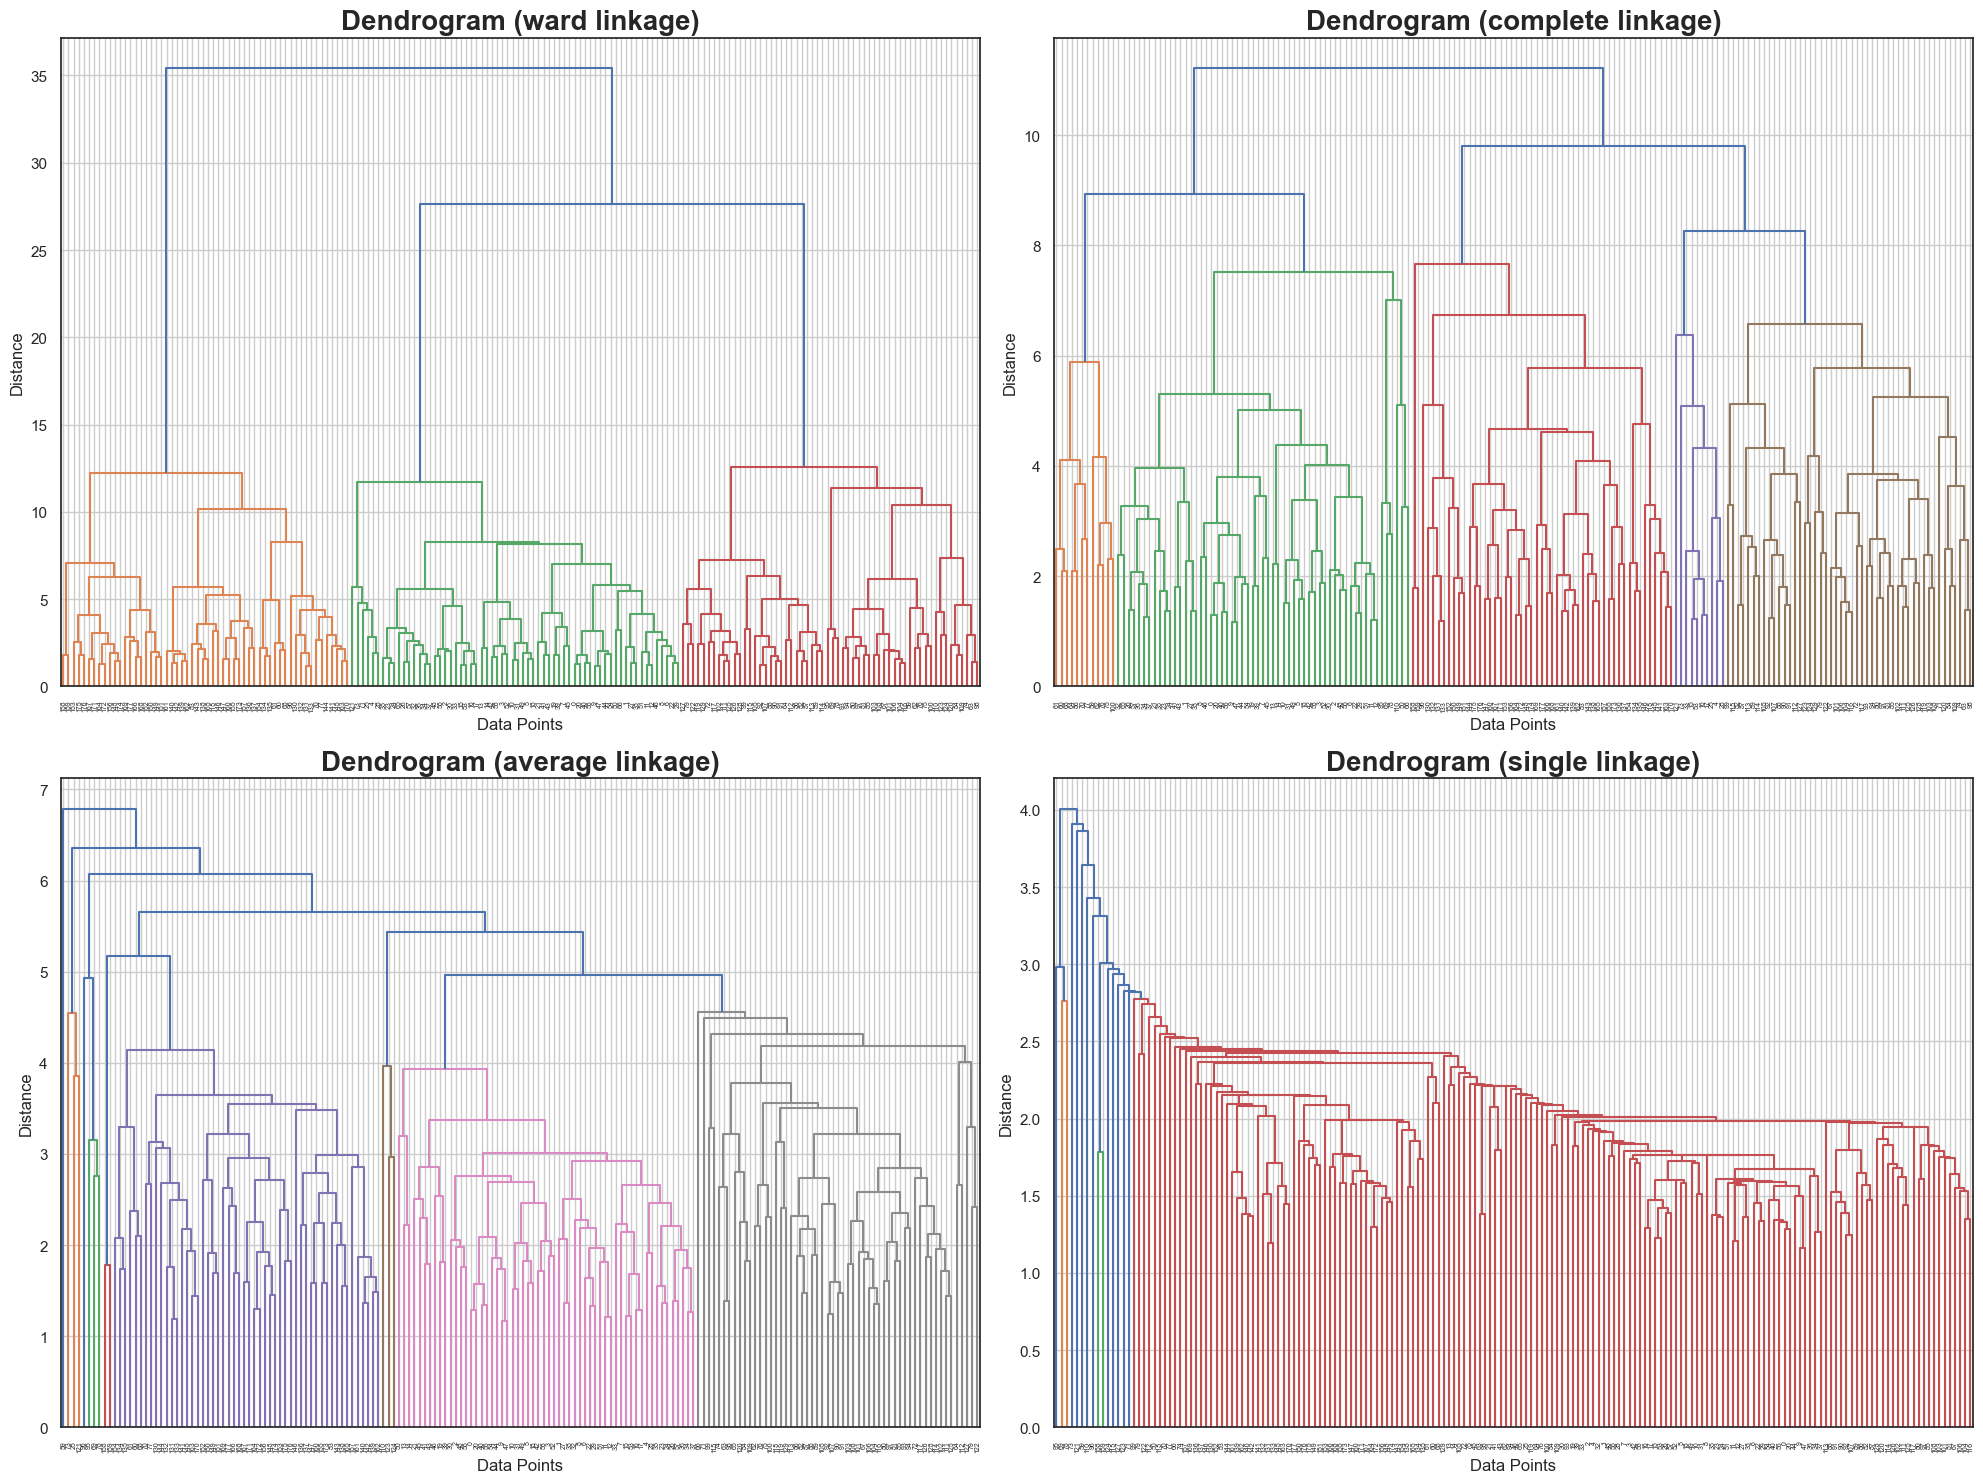

In [ ]:
def plot_dendrograms(df_scaled):
    linkages = ['ward', 'complete', 'average', 'single']
    
    plt.figure(figsize = (20, 15))
    for i, linkage in enumerate(linkages, 1):
        plt.subplot(2, 2, i)
        linkage_matrix = sch.linkage(df_scaled, method = linkage)
        sch.dendrogram(linkage_matrix)
        plt.title(f'Dendrogram ({linkage} linkage)', fontsize = 20, fontweight = 'bold')
        plt.xlabel('Data Points', fontsize = 12)
        plt.ylabel('Distance', fontsize = 12)
        plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_dendrograms(df_scaled)